# Investment Assigment

In [6]:
# Importing the Excel file and creating the dataframes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the excel files

companies = pd.read_csv (r'D:\Personal\UpgradAIML\Investment\companies.csv', encoding = "ISO-8859-1")
rounds2 = pd.read_csv (r'D:\Personal\UpgradAIML\Investment\rounds2.csv', encoding = "ISO-8859-1")

print (companies.head)

print (rounds2.head)


<bound method NDFrame.head of                                                permalink  \
0                                    /Organization/-Fame   
1                                 /Organization/-Qounter   
2                    /Organization/-The-One-Of-Them-Inc-   
3                                  /Organization/0-6-Com   
4                         /Organization/004-Technologies   
...                                                  ...   
66363  /Organization/Zznode-Science-And-Technology-Co...   
66364                          /Organization/Zzzzapp-Com   
66365                               /Organization/ÃEron   
66366                             /Organization/ÃAsys-2   
66367  /Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...   

                                                name  \
0                                              #fame   
1                                           :Qounter   
2                             (THE) ONE of THEM,Inc.   
3                        

In [7]:
#converting all the permalinks to lowercase to avoide null values due to diffrence in stringcase
companies["permalink"] = companies["permalink"].str.lower()

rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()

In [8]:
#checking unique companies in both the dataframes

print(len(companies.permalink.unique()))

print (len(rounds2.company_permalink.unique()))

#checking the companies present in rounds2 but not in company

print(len(rounds2.loc[rounds2["company_permalink"].isin(companies["permalink"]), :]))

66368
66370
114942


Missing Values


In [9]:
#printing the null values for each dataframe

print("Null Values in Companies Dataset\n",companies.isnull().sum(), "\n\n")

print("Null Values in Rounds2 Dataset\n",rounds2.isnull().sum())


Null Values in Companies Dataset
 permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64 


Null Values in Rounds2 Dataset
 company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64


Merging two dataframes since no missing value in the Permalink column


In [10]:
# Merging both the dataframes
master_frame = pd.merge(companies, rounds2, how="inner", left_on = "permalink", right_on = "company_permalink")
master_frame.head(10)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [11]:
#Checking Companies present in rounds2 dataframe which aren't present in companies dataframe

rounds2.loc[~rounds2["company_permalink"].isin(companies["permalink"]), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [12]:
# Checking the number of observations in the Master_frame
len(master_frame)

114942

In [13]:
#Solution discussed in session for decoding cp1254 string

rounds2["company_permalink"] = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2.loc[~rounds2["company_permalink"].isin(companies["permalink"]), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
...,...,...,...,...,...,...
110545,/organization/whodats-spaces,/funding-round/d5d6db3d1e6c54d71a63b3aa0c9278e6,seed,NaN,28-10-2014,30000.0
113839,/organization/zengame-,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [14]:
#viewing the missing values in the master_frame and displaying as percentage, this will give us an insight which columns have maximum 
#of the value missing and needs to be dropped & which once we can ignore or replace the missing values by mode/median/

round(100*master_frame.isnull().sum()/len(master_frame.index), 2)

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [15]:
# Dropping cloumns which are not required for us, like the "funding_rounded_code", "homepage_url", "Founded_at", country, state, region

master_frame = master_frame.drop(['funding_round_code', 'homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)
master_frame.head()



,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [16]:
#Statistics of raised_amount_usd

master_frame['raised_amount_usd'].describe()

count    9.495800e+04
mean     1.042696e+07
std      1.148218e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680521e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

Mean and Median values are very diffrent 10 M USD and 1 M USD respectively, also the Min & Max values have a large gap.

So dropping the null values makes sence than imputing them with metric such as mean/median.

Since there is a large spread in the data limits and we have a lot of rows, so we can just drop the null values.

In [17]:
#removing null values present in raised_amount_usd, i.e the complete rows

master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

# Analysing the investment

In [18]:
investment = master_frame.loc[(master_frame.funding_round_type=="venture") | (master_frame.funding_round_type=="seed") | (master_frame.funding_round_type=="private_equity") | (master_frame.funding_round_type=="angel")]

# Median investment types across the new dataframe, which can also be Representative funding Amount for each investment type

investment.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               400000.0
seed                275000.0
Name: raised_amount_usd, dtype: float64

Since Spark Funds limit is with 5m - 15 mil ,Hence venture type investments will be suitable for their investment plans.


# Country Analysis

In [19]:
# creating new datatype for Venture funding_round_type category
investment_venture = investment[investment.funding_round_type == "venture"]

#sorting the countries the amount of investments done 

countries = investment_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

In [20]:
countries[:9]


country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

In [21]:
# filteringtop three countries
investment = investment[(investment.country_code=='USA') | (investment.country_code=='GBR') | (investment.country_code=='IND')]
investment.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


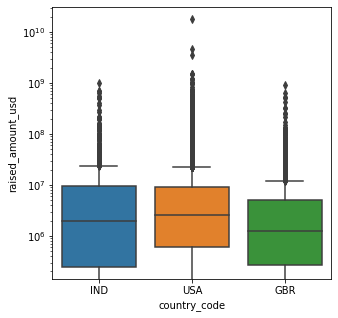

In [22]:
# boxplot graph to see distributions of funding amount across countries
plt.figure(figsize=(5, 5))
sns.boxplot(x='country_code', y='raised_amount_usd', data=investment)
plt.yscale('log')
plt.show()

# Sector Analysis


In [51]:
# extracting the main category

mapping = pd.read_csv(r'D:\Personal\UpgradAIML\Investment\mapping.csv')

df= pd.merge(master_frame, mapping, how="inner", left_on = "category_list", right_on = "category_list")

df['category_list'] = df['category_list'].astype(str)

df.loc[:, 'main_category'] = df['category_list'].apply(lambda x: x.split("|")[0])

df.head()


,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_category
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,0,0,0,1,0,0,0,0,0,Media
1,/organization/all-def-digital,All Def Digital,Media,operating,USA,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,0,0,0,1,0,0,0,0,0,Media
2,/organization/anthill-magazine,Anthill Magazine,Media,operating,AUS,/organization/anthill-magazine,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,09-04-2015,600000.0,0,0,0,1,0,0,0,0,0,Media
3,/organization/basel-switzerland,The Speedel Group,Media,closed,CHE,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,07-01-2002,13439178.0,0,0,0,1,0,0,0,0,0,Media
4,/organization/basel-switzerland,The Speedel Group,Media,closed,CHE,/organization/basel-switzerland,/funding-round/b6403185d64ae92299ad625c9d99b05d,venture,05-08-2005,55464142.0,0,0,0,1,0,0,0,0,0,Media


In [54]:
# dropping the category_list column
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_category
0,/organization/-fame,#fame,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,0,0,0,1,0,0,0,0,0,Media
1,/organization/all-def-digital,All Def Digital,operating,USA,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,0,0,0,1,0,0,0,0,0,Media
2,/organization/anthill-magazine,Anthill Magazine,operating,AUS,/organization/anthill-magazine,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,09-04-2015,600000.0,0,0,0,1,0,0,0,0,0,Media
3,/organization/basel-switzerland,The Speedel Group,closed,CHE,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,07-01-2002,13439178.0,0,0,0,1,0,0,0,0,0,Media
4,/organization/basel-switzerland,The Speedel Group,closed,CHE,/organization/basel-switzerland,/funding-round/b6403185d64ae92299ad625c9d99b05d,venture,05-08-2005,55464142.0,0,0,0,1,0,0,0,0,0,Media


In [55]:
# Imorting Mapping excel and creating new dataframe

mapping = pd.read_csv(r'D:\Personal\UpgradAIML\Investment\mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Missing Values in mapping

In [56]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [38]:
#removing row with missing value
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [44]:
#converting column to same case

mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] = df['main_category'].str.lower()

In [57]:
mapping['category_list']


0                   NaN
1                    3D
2           3D Printing
3         3D Technology
4            Accounting
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 688, dtype: object

In [58]:
# checking values in main_category in df which are not present in the category_list column in mapping file
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_category
23483,/organization/123feng-com,123Feng.Com,operating,CHN,/organization/123feng-com,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,27-10-2015,13000000.0,0,1,0,0,0,0,0,0,0,nan
23484,/organization/17-media,17 Media,operating,NaN,/organization/17-media,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,05-11-2015,10000000.0,0,1,0,0,0,0,0,0,0,nan
23485,/organization/1mxians,1mxians,operating,CHN,/organization/1mxians,/funding-round/6950448f81c6706abe61f659e15a7c87,venture,02-12-2015,15000000.0,0,1,0,0,0,0,0,0,0,nan
23486,/organization/3divaz-2,3DIVAZ,closed,NaN,/organization/3divaz-2,/funding-round/2c236a01cf37f6d401b2f8b72684e0f7,seed,01-11-2015,202250.0,0,1,0,0,0,0,0,0,0,nan
23487,/organization/3divaz-3,3DIVAZ,operating,CHE,/organization/3divaz-3,/funding-round/730a853fe91ece1519421c62dd71623a,seed,01-11-2015,202250.0,0,1,0,0,0,0,0,0,0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24522,/organization/zapgocharger-ltd,Zapgocharger Ltd,closed,NaN,/organization/zapgocharger-ltd,/funding-round/ba235a9d29d822f172bfb76b93fc99a9,equity_crowdfunding,13-05-2015,577250.0,0,1,0,0,0,0,0,0,0,nan
24523,/organization/zeros-ones,Zeros & Ones,closed,USA,/organization/zeros-ones,/funding-round/11834b451505c8e423b98cb43c2e68fb,venture,13-12-1999,20000000.0,0,1,0,0,0,0,0,0,0,nan
24524,/organization/zip-trade-technologies,Zip Trade Technologies,closed,NaN,/organization/zip-trade-technologies,/funding-round/74b8565f7f28bf31ffcb62626d658654,venture,08-11-2007,20000000.0,0,1,0,0,0,0,0,0,0,nan
24525,/organization/zkey-com,Zkey.com,closed,NaN,/organization/zkey-com,/funding-round/aca95e6dda1b354ebee80bca5f261607,venture,22-11-1999,10000000.0,0,1,0,0,0,0,0,0,0,nan


In [60]:
#replacing zero with NA
mapping['category_list'] = mapping['category_list'].astype(str)
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na'))
print(mapping['category_list'])

0                   nan
1                    3D
2           3D Printing
3         3D Technology
4            Accounting
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 688, dtype: object


Merging Dataframes


In [61]:
# mergig df and mapping
df = pd.merge(df, mapping, how='inner', left_on='main_category', right_on='category_list')
df.head()

,permalink,name,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Automotive & Sports_x,...,category_list,Automotive & Sports_y,Blanks_y,Cleantech / Semiconductors_y,Entertainment_y,Health_y,Manufacturing_y,"News, Search and Messaging_y",Others_y,"Social, Finance, Analytics, Advertising_y"
0,/organization/-fame,#fame,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,0,...,Media,0,0,0,1,0,0,0,0,0
1,/organization/all-def-digital,All Def Digital,operating,USA,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,0,...,Media,0,0,0,1,0,0,0,0,0
2,/organization/anthill-magazine,Anthill Magazine,operating,AUS,/organization/anthill-magazine,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,09-04-2015,600000.0,0,...,Media,0,0,0,1,0,0,0,0,0
3,/organization/basel-switzerland,The Speedel Group,closed,CHE,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,07-01-2002,13439178.0,0,...,Media,0,0,0,1,0,0,0,0,0
4,/organization/basel-switzerland,The Speedel Group,closed,CHE,/organization/basel-switzerland,/funding-round/b6403185d64ae92299ad625c9d99b05d,venture,05-08-2005,55464142.0,0,...,Media,0,0,0,1,0,0,0,0,0


In [62]:
#dropping same coloum with diffrect column name

df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Automotive & Sports_x,...,main_category,Automotive & Sports_y,Blanks_y,Cleantech / Semiconductors_y,Entertainment_y,Health_y,Manufacturing_y,"News, Search and Messaging_y",Others_y,"Social, Finance, Analytics, Advertising_y"
0,/organization/-fame,#fame,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,0,...,Media,0,0,0,1,0,0,0,0,0
1,/organization/all-def-digital,All Def Digital,operating,USA,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,0,...,Media,0,0,0,1,0,0,0,0,0
2,/organization/anthill-magazine,Anthill Magazine,operating,AUS,/organization/anthill-magazine,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,09-04-2015,600000.0,0,...,Media,0,0,0,1,0,0,0,0,0
3,/organization/basel-switzerland,The Speedel Group,closed,CHE,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,07-01-2002,13439178.0,0,...,Media,0,0,0,1,0,0,0,0,0
4,/organization/basel-switzerland,The Speedel Group,closed,CHE,/organization/basel-switzerland,/funding-round/b6403185d64ae92299ad625c9d99b05d,venture,05-08-2005,55464142.0,0,...,Media,0,0,0,1,0,0,0,0,0


In [64]:
# store the value and id in separate arrays

valuevar = df.columns[9:18]

# take the setdiff() to get the rest of the variables
idvar = np.setdiff1d(df.columns, valuevar)

print(valuevar, "\n")
print(idvar)

Index(['Automotive & Sports_x', 'Blanks_x', 'Cleantech / Semiconductors_x',
       'Entertainment_x', 'Health_x', 'Manufacturing_x',
       'News, Search and Messaging_x', 'Others_x',
       'Social, Finance, Analytics, Advertising_x'],
      dtype='object') 

['Automotive & Sports_y' 'Blanks_y' 'Cleantech / Semiconductors_y'
 'Entertainment_y' 'Health_y' 'Manufacturing_y'
 'News, Search and Messaging_y' 'Others_y'
 'Social, Finance, Analytics, Advertising_y' 'company_permalink'
 'country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'main_category' 'name' 'permalink' 'raised_amount_usd' 'status']


In [66]:
# convert into long
long_df = pd.melt(df, 
        id_vars=list(idvar), 
        value_vars=list(valuevar))

long_df.head()

,Automotive & Sports_y,Blanks_y,Cleantech / Semiconductors_y,Entertainment_y,Health_y,Manufacturing_y,"News, Search and Messaging_y",Others_y,"Social, Finance, Analytics, Advertising_y",company_permalink,...,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,0,0,0,1,0,0,0,0,0,/organization/-fame,...,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,Media,#fame,/organization/-fame,10000000.0,operating,Automotive & Sports_x,0
1,0,0,0,1,0,0,0,0,0,/organization/all-def-digital,...,06-08-2014,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,Media,All Def Digital,/organization/all-def-digital,5000000.0,operating,Automotive & Sports_x,0
2,0,0,0,1,0,0,0,0,0,/organization/anthill-magazine,...,09-04-2015,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,Media,Anthill Magazine,/organization/anthill-magazine,600000.0,operating,Automotive & Sports_x,0
3,0,0,0,1,0,0,0,0,0,/organization/basel-switzerland,...,07-01-2002,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,Media,The Speedel Group,/organization/basel-switzerland,13439178.0,closed,Automotive & Sports_x,0
4,0,0,0,1,0,0,0,0,0,/organization/basel-switzerland,...,05-08-2005,/funding-round/b6403185d64ae92299ad625c9d99b05d,venture,Media,The Speedel Group,/organization/basel-switzerland,55464142.0,closed,Automotive & Sports_x,0


In [67]:
# remove rows with value=0

long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)

In [68]:
#length of new DF

long_df.head()
len(long_df)

42603

In [69]:
# info
long_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42603 entries, 35926 to 383421
Data columns (total 20 columns):
Automotive & Sports_y                        42603 non-null int64
Blanks_y                                     42603 non-null int64
Cleantech / Semiconductors_y                 42603 non-null int64
Entertainment_y                              42603 non-null int64
Health_y                                     42603 non-null int64
Manufacturing_y                              42603 non-null int64
News, Search and Messaging_y                 42603 non-null int64
Others_y                                     42603 non-null int64
Social, Finance, Analytics, Advertising_y    42603 non-null int64
company_permalink                            42603 non-null object
country_code                                 40345 non-null object
funded_at                                    42603 non-null object
funding_round_permalink                      42603 non-null object
funding_round_type      

In [70]:
# summarising the sector-wise number and sum of venture investments across three countries

# first, let's also filter for investment range between 5 and 15m
df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]

In [71]:
# groupby country, sector and compute the count and sum
df.groupby(['country_code', 'variable']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code variable                                                      
ARE          Cleantech / Semiconductors_x                   1  1.200000e+07
             News, Search and Messaging_x                   1  5.000000e+06
             Others_x                                       3  3.367000e+07
             Social, Finance, Analytics, Advertising_x      1  5.250000e+06
ARG          News, Search and Messaging_x                   2  2.080000e+07
...                                                       ...           ...
USA          Social, Finance, Analytics, Advertising_x    383  3.248489e+09
VNM          Blanks_x                                       4  2.776000e+07
             Entertainment_x                                1  1.500000e+07
ZAF          Others_x                                       2  1.953000e+07
             Social, Finance, Analytics, Advertising_x      1  1.000000e+07

[240 rows x 2 columns]

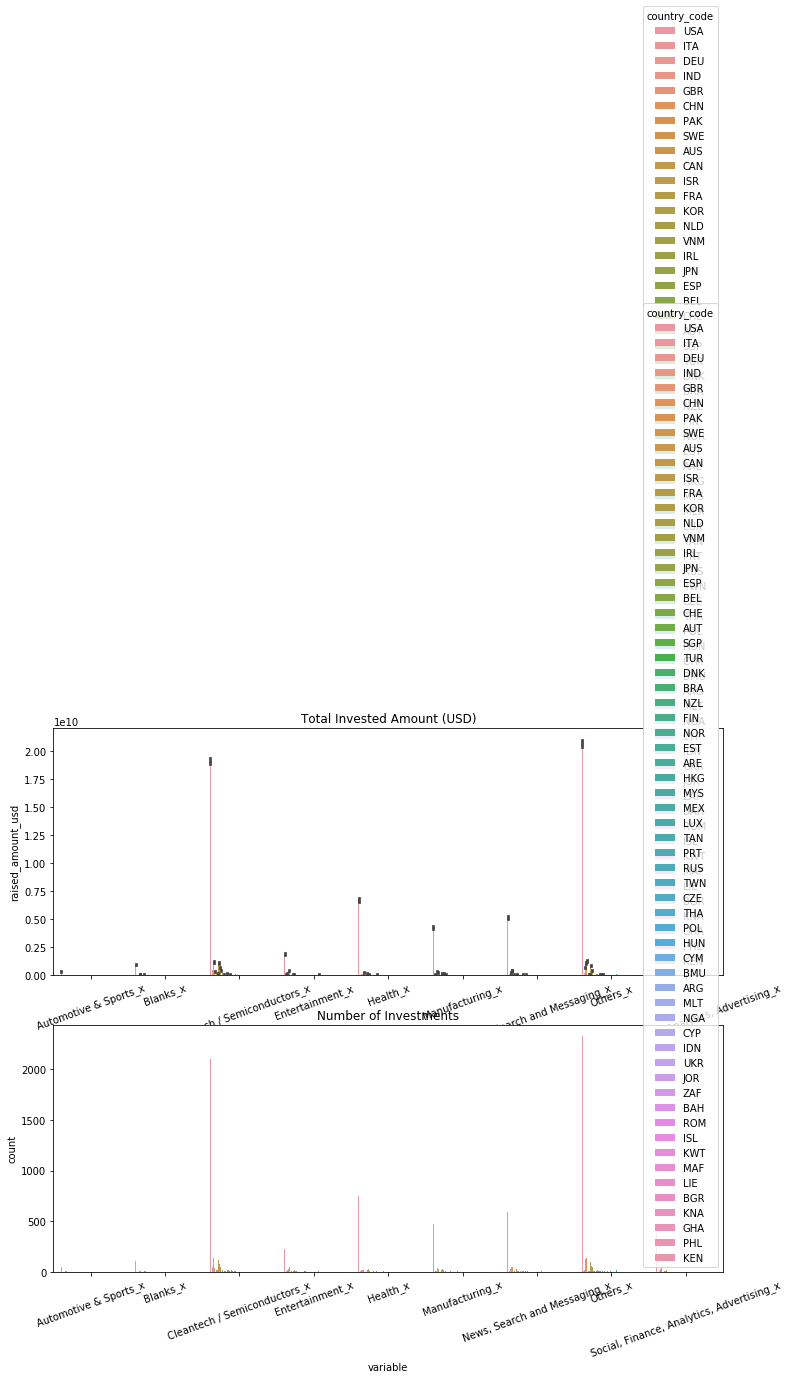

In [74]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
p = sns.barplot(x='variable', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=20)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='variable', hue='country_code', data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=20)
plt.title('Number of Investments')


plt.show()

In [75]:
df.to_excel(r'D:\Personal\UpgradAIML\Investment\final.xlsx', index = False)